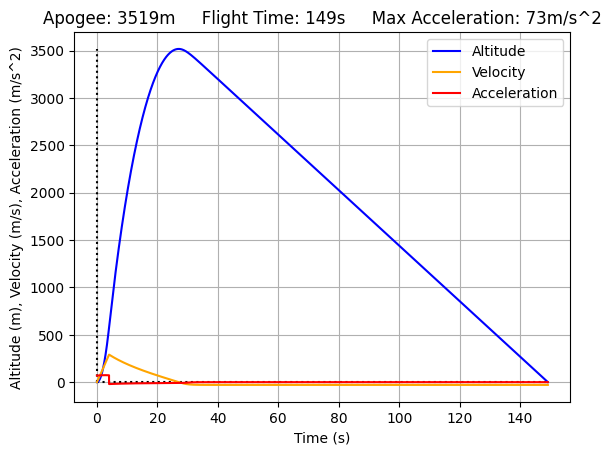

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
GRAVITY = 9.81

# User inputs
dry_mass = 20.1  # kg
prop_mass = 4.0  # kg
thrust = 1900  # N
burn_time = 4.0  # s
cd = 0.28  # Initial C_D
area = 0.0175  # Initial area, m^2
parachute_cd = 1.5
parachute_area = 0.3048  # m^2

# Initial values
alt = 0  # Altitude
vel = 0  # Velocity
mass = dry_mass + prop_mass  # Mass

tstep = 0.01  # Timestep, seconds
time = 0  # s

# Lists to store data
time_values = []
altitude_values = []
velocity_values = []
acceleration_values = []

def calculate_acceleration(thrust, mass, vel, cd, area, parachute_cd, parachute_area):
    # Calculate acceleration based on thrust, drag, and gravity
    
    # Initializing
    acc = 0

    if time <= burn_time:
        mass = dry_mass + (prop_mass * ((burn_time - time) / burn_time))
        acc = thrust / mass
    
    acc -= GRAVITY

    # Parachute deployment at apogee
    if vel < 0:
        cd = parachute_cd
        area = parachute_area

    drag = 0.5 * 1.204 * (abs(vel) * vel) * cd * area
    acc -= drag / mass

    return acc

# Main loop
while alt >= 0:
    # Calculate acceleration, store data, and update values
    acc = calculate_acceleration(thrust, mass, vel, cd, area, parachute_cd, parachute_area)

    # Store data
    time_values.append(time)
    altitude_values.append(alt)
    velocity_values.append(vel)
    acceleration_values.append(acc)

    # Update values
    vel = vel + (acc * tstep)
    alt = alt + (vel * tstep)

    time += tstep

# Convert lists to numpy arrays for further analysis and plotting
time_values = np.array(time_values)
altitude_values = np.array(altitude_values)
velocity_values = np.array(velocity_values)
acceleration_values = np.array(acceleration_values)

# Getting the max values for plotting
max_values = np.max(np.column_stack((altitude_values, velocity_values, acceleration_values)), axis=0)

# Plot
plt.hlines(0, 0, time_values[-1], color="k", linestyles="dotted")
plt.vlines(0, 0, max_values[0], color="k", linestyles="dotted")

plt.xlabel("Time (s)")
plt.plot(time_values, altitude_values, color="b", label="Altitude")
plt.plot(time_values, velocity_values, color="orange", label="Velocity")
plt.plot(time_values, acceleration_values, color="r", label="Acceleration")

plt.title(f"Apogee: {int(max_values[0])}m     Flight Time: {int(time_values[-1])}s     Max Acceleration: {int(max_values[2])}m/s^2") 
plt.ylabel("Altitude (m), Velocity (m/s), Acceleration (m/s^2)")
plt.legend()

plt.grid()
plt.show()